In [14]:
import matplotlib.pyplot as plt
import yaml
import os
import numpy as np

In [15]:
# prior_a_path = "/home/argon/Stuff/learn_prior/cg_single_chain_2024.06.26_CA_lj_dihedralX_tag/priors.yaml"
# prior_b_path = "/home/argon/Stuff/learn_prior/prior_single_chain_2024.06.26_CA_lj_dihedralX_tag/learn_ff.yml"

# prior_a_path = "/home/argon/Stuff/learn_prior/cg_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag/priors.yaml"
# prior_b_path = "/home/argon/Stuff/learn_prior/prior_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag/learn_ff.yml"

In [16]:
prior_paths = [
    "/home/argon/Stuff/learn_prior/cg_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag/priors.yaml",
    "/home/argon/Stuff/learn_prior/prior_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag_lr_0.05_gamma_0.9/priors-best.yaml",
    "/home/argon/Stuff/learn_prior/prior_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag_lr_0.01_gamma_0.9/priors-best.yaml",
    "/home/argon/Stuff/learn_prior/prior_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag_lr_0.005_gamma_0.9/priors-best.yaml",
    "/home/argon/Stuff/learn_prior/prior_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag_lr_0.005/priors-best.yaml",
    "/home/argon/Stuff/learn_prior/prior_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag_lr_0.001/priors-best.yaml",
    "/home/argon/Stuff/learn_prior/prior_single_chain_2024.06.26_CA_lj_angleXCX_dihedralX_tag_lr_0.0025/priors-best.yaml",
]
# prior_paths = [
#     "/home/argon/Stuff/prior_test/1PEF_before//Prior_CA/1PEF/raw/1PEF_priors.yaml",
#     "/home/argon/Stuff/prior_test/1PEF_accum/Prior_CA/1PEF/raw/1PEF_priors.yaml"
# ]

In [17]:
prior_yaml = [yaml.load(open(fn, "r"), Loader=yaml.FullLoader) for fn in prior_paths]
prior_names = [os.path.basename(os.path.dirname(fn)) for fn in prior_paths]

In [18]:
def plot_key(ax, data, key, label=None):
    names = sorted(data.keys())
    values = []
    for k in names:
        values.append(data[k][key])
    ax.scatter(range(len(names)), values, s=2, label=label)
    ax.set_xticks(range(len(names)), names, rotation=90)

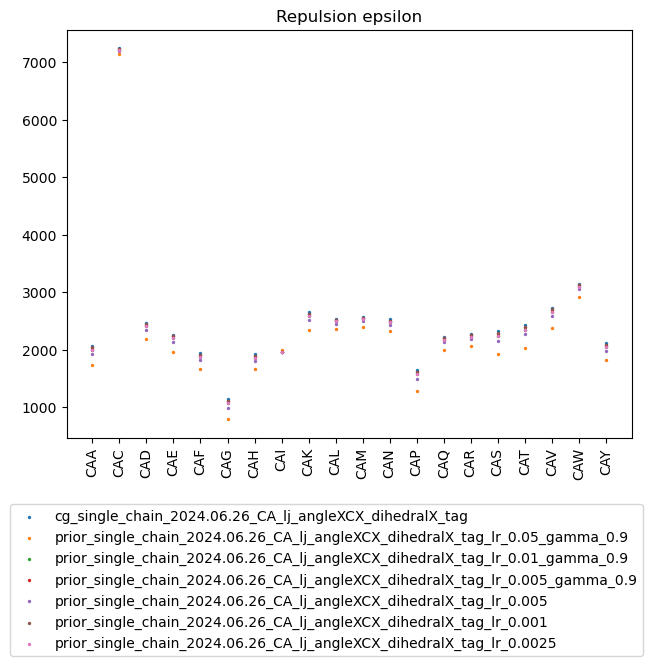

In [19]:
for i in range(len(prior_yaml)):
    plot_key(plt.gca(), prior_yaml[i]["lj"], "epsilon", prior_names[i])

plt.gcf().tight_layout()
plt.gcf().legend(loc='lower center', bbox_to_anchor=(0.5, -0.05*len(prior_names)))
plt.gca().set_title("Repulsion epsilon")
pass

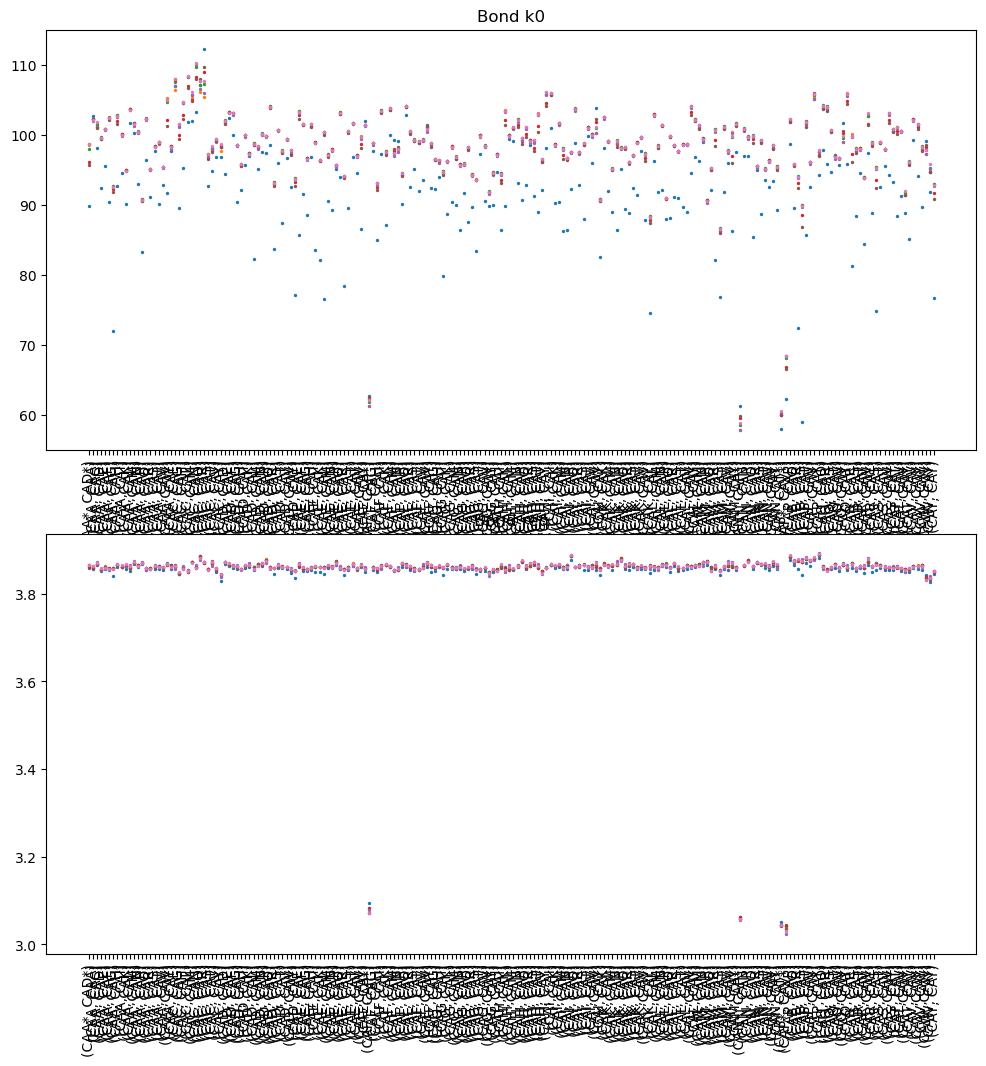

In [20]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
for i in range(len(prior_yaml)):
    plot_key(ax[0], prior_yaml[i]["bonds"], "k0")
    ax[0].set_title("Bond k0")
    plot_key(ax[1], prior_yaml[i]["bonds"], "req", prior_names[i])
    ax[1].set_title("Bond req")

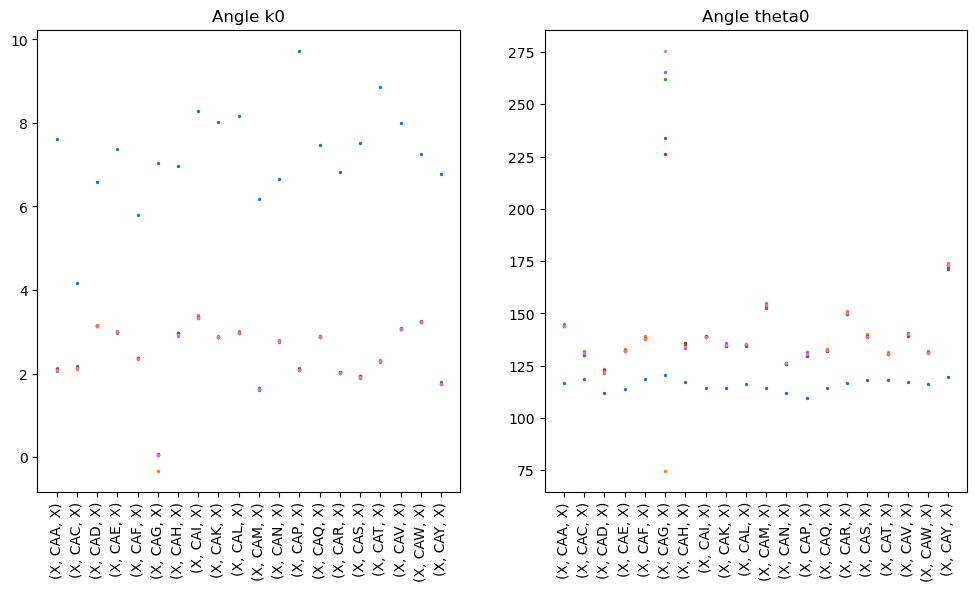

In [21]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
for i in range(len(prior_yaml)):
    plot_key(ax[0], prior_yaml[i]["angles"], "k0")
    ax[0].set_title("Angle k0")
    plot_key(ax[1], prior_yaml[i]["angles"], "theta0", prior_names[i])
    ax[1].set_title("Angle theta0")

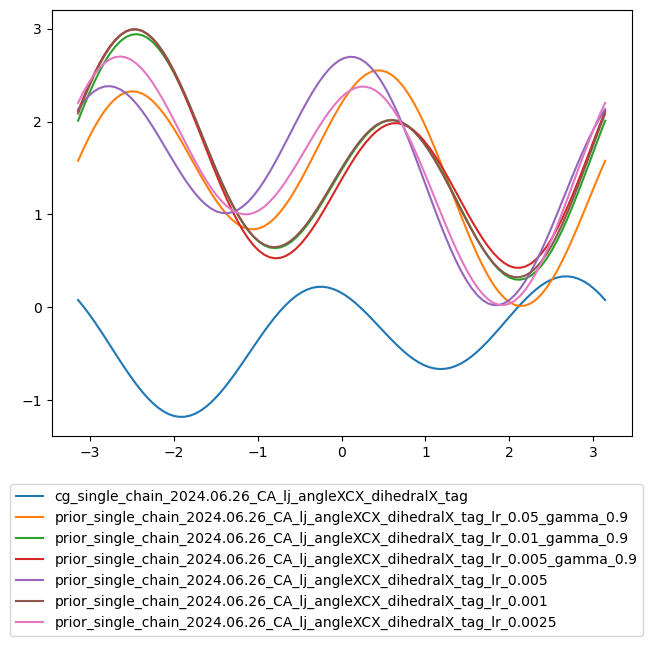

In [22]:
# This only works for wildcard "(X, X, X, X)"" dihedrals currently

def dihedral_fit_fun(theta, n_terms, offset, *args):
    # Implements the TorchMD torsion function
    # https://doi.org/10.1021/acs.jctc.0c01343?rel=cite-as&ref=PDF&jav=VoR
    # args = [phi_k0, phase0, phi_k1, phase1, ...]
    assert len(args) == n_terms*2
    result = offset
    for i in range(0,n_terms):
        phi_k = args[i*2]
        phase = args[i*2+1]
        per = i+1
        # result += phi_k*(1+np.cos( (per*theta - phase)*np.pi/180.0) )
        result += phi_k*(1+np.cos( (per*theta - phase)) )
    return result

def plot_dihedral(ax, terms_dict, label=None):
    n_terms = len(terms_dict)
    args = [0]*n_terms*2
    for term in terms_dict:
        per, phase, phi_k = term["per"], term["phase"], term["phi_k"]
        args[2*(per-1)+0] = phi_k
        args[2*(per-1)+1] = phase
    dihedral_range = [-np.pi, np.pi]
    plot_space = np.linspace(*(np.array(dihedral_range)), 100)
    ax.plot(plot_space, dihedral_fit_fun(plot_space, n_terms, 0, *args), label=label)


for i in range(len(prior_yaml)):
    # plot_dihedral(plt.gca(), prior_yaml[i]["dihedrals"]["(X, X, X, X)"]["terms"])
    plot_dihedral(plt.gca(), prior_yaml[i]["dihedrals"]["(X, X, X, X)"]["terms"], prior_names[i])

plt.gcf().tight_layout()
plt.gcf().legend(loc='lower center', bbox_to_anchor=(0.5, -0.05*len(prior_names)))
pass